# Project- Data Presentation 2023-2024
## World Happiness Report en Suicide Rates Overview 2015 tot 2021

### Probleemstelling

Wij willen voor de dataset World Happiness een meer gestructureerde weergave/link tonen met de datasets van suicide rates, die meer informatie bieden over het aantal zelfmoorden in een land tussen 2015 en 2021.

In [1]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, format_number
import matplotlib.pyplot as plt
from pandas.plotting import table
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output
import seaborn as sns
import pandas as pd
import numpy as np
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
from pyspark.sql.functions import sum as spark_sum
import folium
import json
import requests


sc = SparkSession.builder.master("local[1]").appName("SparkByExamples.com").getOrCreate()


your 131072x1 screen size is bogus. expect trouble
23/12/13 09:57:26 WARN Utils: Your hostname, THE-FLYING-SYSTEM resolves to a loopback address: 127.0.1.1; using 172.23.185.89 instead (on interface eth0)
23/12/13 09:57:26 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/13 09:57:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
## inladen van Data
happyness_dataframe = sc.read.format('csv').option('header', 'true').option("delimiter", ",").load("../ProjectDataPresentation/Data/Happy Index/master.csv")
suicide2015_dataframe = sc.read.format('csv').option('header', 'true').option("delimiter", ",").load("../ProjectDataPresentation/Data/Suicide rate/2015.csv")
suicide2016_dataframe = sc.read.format('csv').option('header', 'true').option("delimiter", ",").load("../ProjectDataPresentation/Data/Suicide rate/2016.csv")
suicide2017_dataframe = sc.read.format('csv').option('header', 'true').option("delimiter", ",").load("../ProjectDataPresentation/Data/Suicide rate/2017.csv")
suicide2018_dataframe = sc.read.format('csv').option('header', 'true').option("delimiter", ",").load("../ProjectDataPresentation/Data/Suicide rate/2018.csv")
suicide2019_dataframe = sc.read.format('csv').option('header', 'true').option("delimiter", ",").load("../ProjectDataPresentation/Data/Suicide rate/2019.csv")
suicide2020_dataframe = sc.read.format('csv').option('header', 'true').option("delimiter", ",").load("../ProjectDataPresentation/Data/Suicide rate/2020.csv")

## Dataset World happiness tonen

Hier toon ik voor de dataframe world-hapyness de tabel ervan

In [3]:
happyness_dataframe_distinct = happyness_dataframe
happyness_dataframe_distinct.show()

+-------+----+------+-----------+-----------+----------+-----------------+------------+------------+------------------+------------------+---------------+
|Country|year|   sex|        age|suicides_no|population|suicides/100k pop|country-year|HDI for year| gdp_for_year ($) |gdp_per_capita ($)|     generation|
+-------+----+------+-----------+-----------+----------+-----------------+------------+------------+------------------+------------------+---------------+
|Albania|1987|  male|15-24 years|         21|    312900|             6.71| Albania1987|        NULL|    2,15,66,24,900|               796|   Generation X|
|Albania|1987|  male|35-54 years|         16|    308000|             5.19| Albania1987|        NULL|    2,15,66,24,900|               796|         Silent|
|Albania|1987|female|15-24 years|         14|    289700|             4.83| Albania1987|        NULL|    2,15,66,24,900|               796|   Generation X|
|Albania|1987|  male|  75+ years|          1|     21800|             4

## Dataset Suicide rates tonen

Voor elke suicide dataframe van 2015 tot 2021 zal ik hier hun tabel tonen voor een structrueel weergave

### Jaar 2015

In [4]:
suicide2015_dataframe.show()

+--------------------+--------------------+--------------+---------------+--------------+------------------------+--------------+------------------------+-------+-----------------------------+----------+-----------------+
|             Country|              Region|Happiness Rank|Happiness Score|Standard Error|Economy (GDP per Capita)|Social support|Health (Life Expectancy)|Freedom|Trust (Government Corruption)|Generosity|Dystopia Residual|
+--------------------+--------------------+--------------+---------------+--------------+------------------------+--------------+------------------------+-------+-----------------------------+----------+-----------------+
|         Switzerland|      Western Europe|             1|          7.587|       0.03411|                  139651|       1.34951|                 0.94143|0.66557|                      0.41978|   0.29678|          2.51738|
|             Iceland|      Western Europe|             2|          7.561|       0.04884|                  13023

### Jaar 2016

In [5]:
suicide2016_dataframe.show()

+-------------+--------------------+--------------+---------------+-------------------------+-------------------------+------------------------+--------------+------------------------+-------+-----------------------------+----------+-----------------+
|      Country|              Region|Happiness Rank|Happiness Score|Lower Confidence Interval|Upper Confidence Interval|Economy (GDP per Capita)|Social support|Health (Life Expectancy)|Freedom|Trust (Government Corruption)|Generosity|Dystopia Residual|
+-------------+--------------------+--------------+---------------+-------------------------+-------------------------+------------------------+--------------+------------------------+-------+-----------------------------+----------+-----------------+
|      Denmark|      Western Europe|             1|          7.526|                     7.46|                    7.592|                  144178|       1.16374|                 0.79504|0.57941|                      0.44453|   0.36171|          2

### Jaar 2017

In [6]:
suicide2017_dataframe.show()

+--------------+--------------+---------------+------------+-----------+------------------------+--------------+------------------------+-----------+-----------+-----------------------------+-----------------+
|       Country|Happiness Rank|Happiness Score|Whisker.high|Whisker.low|Economy (GDP per Capita)|Social support|Health (Life Expectancy)|    Freedom| Generosity|Trust (Government Corruption)|Dystopia Residual|
+--------------+--------------+---------------+------------+-----------+------------------------+--------------+------------------------+-----------+-----------+-----------------------------+-----------------+
|        Norway|             1|    7.537000179| 7.594444821|7.479555538|                  161646|    1.53352356|             0.796666503|0.635422587|0.362012237|                  0.315963835|      2.277026653|
|       Denmark|             2|    7.521999836| 7.581728065|7.462271607|                  148238|   1.551121593|             0.792565525|0.626006722|0.355280489

### Jaar 2018

In [7]:
suicide2018_dataframe.show()

+--------------+--------------------+---------------+------------------------+--------------+------------------------+-------+----------+-----------------------------+
|Happiness rank|             Country|Happiness Score|Economy (GDP per Capita)|Social support|Health (Life Expectancy)|Freedom|Generosity|Trust (Government Corruption)|
+--------------+--------------------+---------------+------------------------+--------------+------------------------+-------+----------+-----------------------------+
|             1|             Finland|          7.632|                  130500|         1.592|                   0.874|  0.681|     0.202|                        0.393|
|             2|              Norway|          7.594|                  145600|         1.582|                   0.861|  0.686|     0.286|                         0.34|
|             3|             Denmark|          7.555|                  135100|          1.59|                   0.868|  0.683|     0.284|                       

### Jaar 2019

In [8]:
suicide2019_dataframe.show()

+--------------+--------------+---------------+------------------------+--------------+------------------------+-------+----------+-----------------------------+
|Happiness Rank|       Country|Happiness Score|Economy (GDP per Capita)|Social support|Health (Life Expectancy)|Freedom|Generosity|Trust (Government Corruption)|
+--------------+--------------+---------------+------------------------+--------------+------------------------+-------+----------+-----------------------------+
|             1|       Finland|          7.769|                  134000|         1.587|                   0.986|  0.596|     0.153|                        0.393|
|             2|       Denmark|            7.6|                  138300|         1.573|                   0.996|  0.592|     0.252|                         0.41|
|             3|        Norway|          7.554|                  148800|         1.582|                   1.028|  0.603|     0.271|                        0.341|
|             4|       Icela

### Jaar 2020

In [9]:
suicide2020_dataframe.show()

+--------------+--------------------+---------------+------------------------------+------------+------------+------------------------+--------------+------------------------+------------------+------------+-----------------------------+------------------------+--------------------------------+----------------------------+-------------------------------------+-----------+------------------------+---------------------------------------+-------------------+
|       Country|  Regional indicator|Happiness Score|Standard error of ladder score|upperwhisker|lowerwhisker|Economy (GDP per Capita)|Social support|Health (Life Expectancy)|freedom in choices|  Generosity|Trust (Government Corruption)|Ladder score in Dystopia|Explained by: Log GDP per capita|Explained by: Social support|Explained by: Healthy life expectancy|    Freedom|Explained by: Generosity|Explained by: Perceptions of corruption|Dystopia + residual|
+--------------+--------------------+---------------+---------------------------

## Data manipulatie

Ik zal hier de bestaande dataframes waar nodig filteren en eventuele overbodige gegevens eruit halen.

### Filteren van happyness_dataframe

Hier haal ik voor het happiness_dataframe de overbodige kolommen eruit die NaN-waardes bevatten en filter ik de gegevens vanaf 2015.

In [10]:
# ------------------------
## filteren van happyness_dataframe
# Voeg een kolom toe aan happyness_dataframe om het jaar uit te halen
happyness_dataframe_distinct = happyness_dataframe_distinct.withColumn("year", col("year").cast("int"))
# Filter de gegevens vanaf het jaar 2015
happyness_dataframe_distinct = happyness_dataframe_distinct.filter(col("year") >= 2015)
# Selecteer de gewenste kolommen en toon het resultaat
selected_columns = ["Country", "year", "sex", "age", "suicides_no","population", "suicides/100k pop", " gdp_for_year ($) ", "generation"]
happyness_dataframe_distinct = happyness_dataframe_distinct.select(selected_columns)
 ## happyness_dataframe heeft nu enkel gegevens van de jaar 2015
# ------------------------

### Filteren van de suicide dataframes

Voor elke dataframe bekijken hoeveel landen er beschikbaar zijn, en hieruit filteren wij voor elke dataframe de onnodige landen eruit, zodat voor elk dataframe evenveel/hetzelfde landen bevatten.

In [11]:
# ------------------------
## filteren en checken van de suicide rates dataframes
suicide2015_dataframe

## Functie om gegevens van 'Country'-kolom in een lijst te plaatsen
def get_country_list_rdd(df):
    return df.select("Country").rdd

# Lijsten met 'Country'-gegevens voor elk DataFrame
countries_2015_rdd = get_country_list_rdd(suicide2015_dataframe)
countries_2016_rdd = get_country_list_rdd(suicide2016_dataframe)
countries_2017_rdd = get_country_list_rdd(suicide2017_dataframe)
countries_2018_rdd = get_country_list_rdd(suicide2018_dataframe)
countries_2019_rdd = get_country_list_rdd(suicide2019_dataframe)
countries_2020_rdd = get_country_list_rdd(suicide2020_dataframe)

country_2015 = countries_2015_rdd.collect()
country_2016 = countries_2016_rdd.collect()
country_2017 = countries_2017_rdd.collect()
country_2018 = countries_2018_rdd.collect()
country_2019 = countries_2019_rdd.collect()
country_2020 = countries_2020_rdd.collect()

print("Totaal landen per jaar waarvan wij data hebben in de suicide reeks")
print("Jaar 2015 bevat " + str(len(country_2015)) + " landen.")
print("Jaar 2016 bevat " + str(len(country_2016)) + " landen.")
print("Jaar 2017 bevat " + str(len(country_2017)) + " landen.")
print("Jaar 2018 bevat " + str(len(country_2018)) + " landen.")
print("Jaar 2019 bevat " + str(len(country_2019)) + " landen.")
print("Jaar 2020 bevat " + str(len(country_2020)) + " landen.")

#-------------------------------------------------------------------------------------------------------------------
## Geadvenceerde filteren van de suicide dataframes op basis van beschikbaar "latest gegevens"
# Filter each DataFrame in de suicide reeks
suicide2015_filtered_df = [item['Country'] for item in suicide2015_dataframe.limit(100).collect()]
suicide2020_filtered_ = suicide2020_dataframe.filter(col('Country').isin(suicide2015_filtered_df))
suicide2020_filtered_df = [item['Country'] for item in suicide2020_filtered_.collect()]

suicide2016_filtered_ = suicide2016_dataframe.filter(col('Country').isin(suicide2020_filtered_df))
suicide2016_filtered_df = [item['Country'] for item in suicide2016_filtered_.collect()]

suicide2017_filtered_ = suicide2017_dataframe.filter(col('Country').isin(suicide2016_filtered_df))
suicide2017_filtered_df_ = [item['Country'] for item in suicide2017_filtered_.collect()]

suicide2018_filtered_ = suicide2018_dataframe.filter(col('Country').isin(suicide2017_filtered_df_))
suicide2018_filtered_df = [item['Country'] for item in suicide2018_filtered_.collect()]

suicide2019_filtered_ = suicide2019_dataframe.filter(col('Country').isin(suicide2018_filtered_df))
suicide2019_filtered_df = [item['Country'] for item in suicide2019_filtered_.collect()]

happyness_filtered = happyness_dataframe_distinct.filter(col('Country').isin(suicide2018_filtered_df))
happyness_df = [item['Country'] for item in happyness_filtered.collect()]

suicide2015_filtered = suicide2015_dataframe.filter(col('Country').isin(happyness_df))
suicide2016_filtered = suicide2016_dataframe.filter(col('Country').isin(happyness_df))
suicide2017_filtered = suicide2017_dataframe.filter(col('Country').isin(happyness_df))
suicide2018_filtered = suicide2018_dataframe.filter(col('Country').isin(happyness_df))
suicide2019_filtered = suicide2019_dataframe.filter(col('Country').isin(happyness_df))
suicide2020_filtered = suicide2020_dataframe.filter(col('Country').isin(happyness_df))
#-------------------------------------------------------------------------------------------------------------------

print()
print("Totaal landen per jaar waarvan wij nu hebben gefilterd per dataframe")
print("Jaar 2015 bevat " + str(len(suicide2015_filtered.collect())) + " landen dat correct gefilterd zijn.")
print("Jaar 2016 bevat " + str(len(suicide2016_filtered.collect())) + " landen dat correct gefilterd zijn.")
print("Jaar 2017 bevat " + str(len(suicide2017_filtered.collect())) + " landen dat correct gefilterd zijn.")
print("Jaar 2018 bevat " + str(len(suicide2018_filtered.collect())) + " landen dat correct gefilterd zijn.")
print("Jaar 2019 bevat " + str(len(suicide2019_filtered.collect())) + " landen dat correct gefilterd zijn.")
print("Jaar 2020 bevat " + str(len(suicide2020_filtered.collect())) + " landen dat correct gefilterd zijn.")

# -----

Totaal landen per jaar waarvan wij data hebben in de suicide reeks
Jaar 2015 bevat 158 landen.
Jaar 2016 bevat 157 landen.
Jaar 2017 bevat 155 landen.
Jaar 2018 bevat 156 landen.
Jaar 2019 bevat 155 landen.
Jaar 2020 bevat 152 landen.

Totaal landen per jaar waarvan wij nu hebben gefilterd per dataframe
Jaar 2015 bevat 62 landen dat correct gefilterd zijn.
Jaar 2016 bevat 62 landen dat correct gefilterd zijn.
Jaar 2017 bevat 62 landen dat correct gefilterd zijn.
Jaar 2018 bevat 62 landen dat correct gefilterd zijn.
Jaar 2019 bevat 62 landen dat correct gefilterd zijn.
Jaar 2020 bevat 62 landen dat correct gefilterd zijn.


Zoals we hier zien, hebben niet alle jaren evenveel gegevens over landen, wat kan leiden tot onnodige fouten in de statistiek/presentatie. Na het filteren zien we dat elke dataframe is afgestemd op 62 landen met hun bijbehorende waarden.

## Grafische voorstelling van data

Hier stel ik voor de gebruiker IPywidgets in voor interactief gebruik. Hiermee kan de persoon een specifiek land selecteren per jaar en leeftijdsgroep, en vervolgens wordt dit gelinkt met de benodigde dataframes voor een nauwkeurigere weergave.

In [12]:
# 'Year' en 'Country' de zijn de belangerijkste kolomnamen
# Vervang deze door de daadwerkelijke kolomnamen in je DataFrame
# jaren en landen ophalen
unique_years = sorted([row.year for row in happyness_filtered.select("year").distinct().collect()])
unique_countries = sorted([row.Country for row in happyness_filtered.select("Country").distinct().collect()])
unique_age = sorted([row.age for row in happyness_filtered.select("age").distinct().collect()])

# Dropdown voor jaar en land
w_year = widgets.Dropdown(options=unique_years, description='Year: ', disabled=False)
w_country = widgets.Dropdown(options=unique_countries, description='Country: ', disabled=False)
w_age = widgets.Dropdown(options=unique_age, description='Age group: ', disabled=False)

In [17]:
# Output area for displaying DataFrame
output_area = widgets.Output()

# Define the schema for the empty DataFrame
schema = StructType([
    StructField("name", StringType(), True),
    StructField("age", IntegerType(), True)
])

year_selected = 0
country_selected = ""

# Functie om DataFrame te filteren op basis van geselecteerde jaar en land
def filter_and_display(year, country, age):
    with output_area:
        clear_output(wait=True)
        if year == '---' or country == '---' or age == '---':
            # If any of the values is '---', display the original DataFrame
            happyness_filtered.show(12, truncate=False)
        else:
            selected_year = year
            # Filter the DataFrame based on the selected values
            happy_selected = happyness_filtered.filter(
                (happyness_filtered.Country == f"{country}") &
                (happyness_filtered.year == f"{year}") &
                (happyness_filtered.age == f"{age}")
            )
            happy_selected.show(12)

            # Select the corresponding suicide DataFrame based on the year
            if year == 2015:
                selected_suicide = suicide2015_filtered
            elif year == 2016:
                selected_suicide = suicide2016_filtered
            elif year == 2017:
                selected_suicide = suicide2017_filtered
            elif year == 2018:
                selected_suicide = suicide2018_filtered
            elif year == 2019:
                selected_suicide = suicide2019_filtered
            else:
                selected_suicide = suicide2020_filtered

            # Filter the selected suicide DataFrame based on the country
            selected_suicide_filtered = selected_suicide.filter(selected_suicide.Country == f"{country}")
            selected_suicide_filtered.show(1)

# Event handler voor wijzigingen in de dropdown-waarden
def on_change(change):
    global year_selected, country_selected 
    if change['type'] == 'change' and change['name'] == 'value':
        year_value = w_year.value
        country_value = w_country.value
        age_value = w_age.value
        year_selected = year_value
        country_selected = country_value
        filter_and_display(year_value, country_value, age_value)

# Koppel de event handler aan de dropdown-waarden
w_year.observe(on_change)
w_country.observe(on_change)
w_age.observe(on_change)

# Toon de widgets
display(w_year)
display(w_country)
display(w_age)
display(output_area)

# Initial display
filter_and_display(w_year.value, w_country.value, w_age.value)


Dropdown(description='Year: ', index=4, options=(2015, 2016, 2017, 2018, 2019, 2020), value=2019)

Dropdown(description='Country: ', options=('Argentina', 'Australia', 'Austria', 'Belarus', 'Belgium', 'Brazil'…

Dropdown(description='Age group: ', index=2, options=('15-24 years', '25-34 years', '35-54 years', '5-14 years…

Output()

### Grafiek en analyse per geselcteerde gegevens

Als een gebruiker een land heeft gekozen, zullen wij voor dat land de belangrijkste staafdiagrammen tonen die grote factoren zijn voor zelfmoordpleging. Tevens wordt ook de totale som getoond van het aantal zelfmoordpogingen (of zelfmoord per 100.000 inwoners) voor dat land tussen 2015 en 2021.

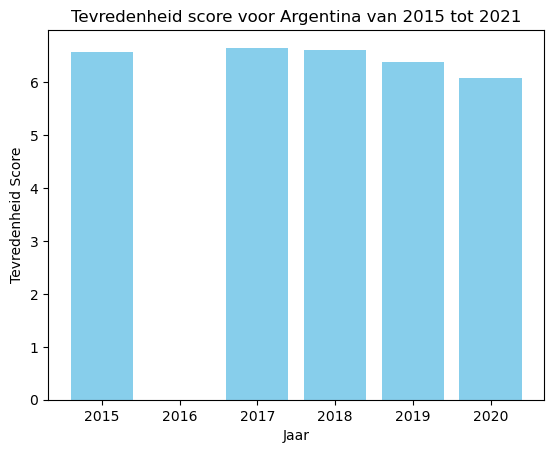

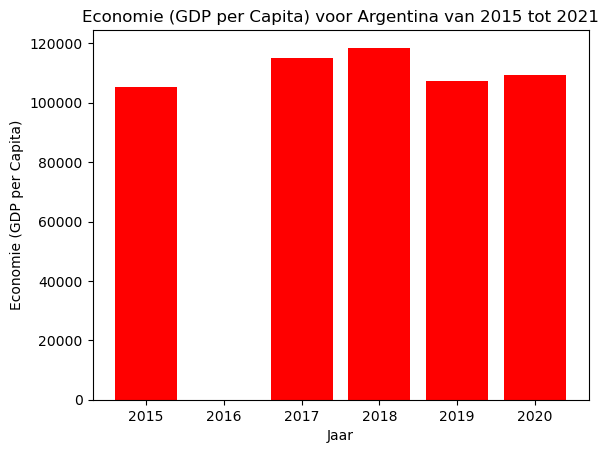

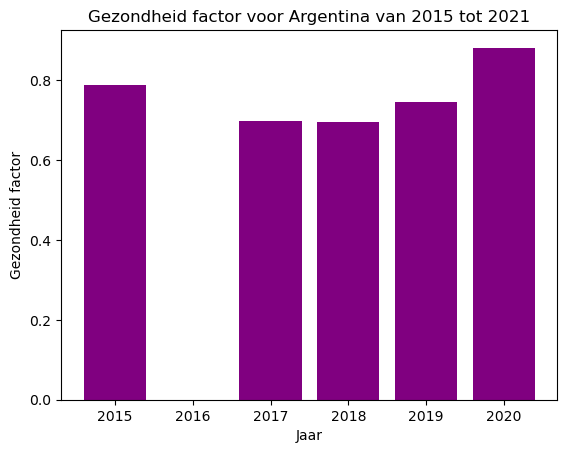

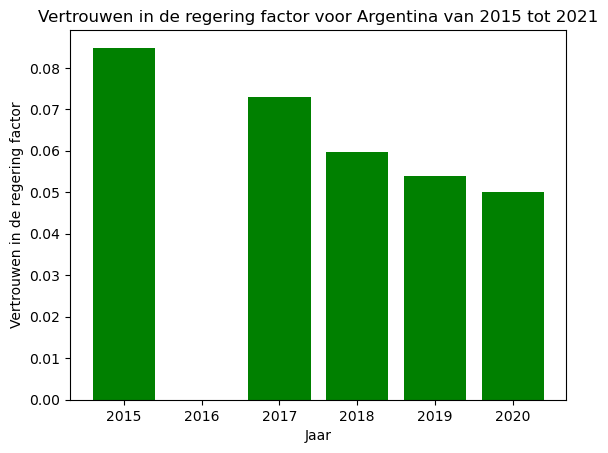

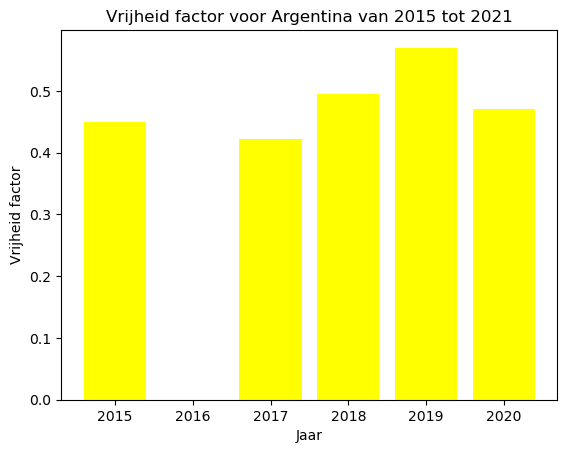

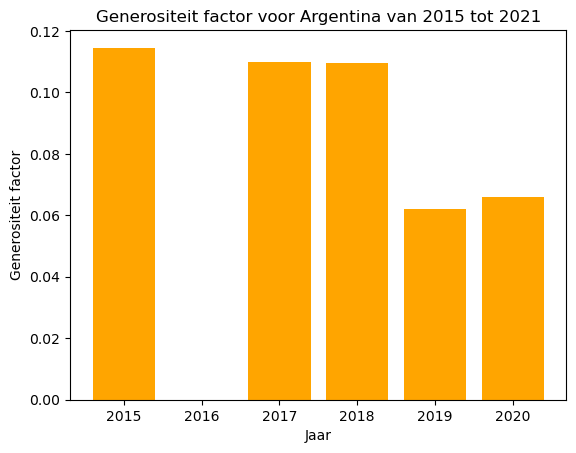

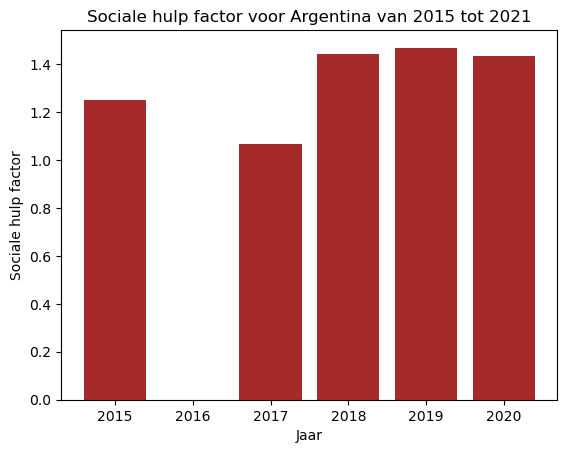

De totale cijfer van zelfmoord/100k populatie bedraagt tussen 2015 tot 2021 voor Argentina: 134.0
De totale cijfer van de aantal zelfmoordpleging in Argentina bedraagt tussen 2015 tot 2021 voor: 12785.0


In [18]:
## Statistische uitvoering op de happyness score
def graph_happyness_display(country):
    # Select data for the specified country
    happyness_filtered_ = happyness_filtered.filter(
        (happyness_filtered.Country == f"{country}")
    )
    unique_years = sorted([row.year for row in happyness_filtered_.select("year").distinct().collect()])

    # Sort by year
    happyness_score_2015 = [float(row['Happiness Score']) for row in suicide2015_filtered.filter(suicide2015_filtered.Country == f"{country}").select('Happiness Score').collect()]
    happyness_score_2016 = [float(row['Happiness Score']) for row in suicide2016_filtered.filter(suicide2016_filtered.Country == f"{country}").select('Happiness Score').collect()]
    happyness_score_2017 = [float(row['Happiness Score']) for row in suicide2017_filtered.filter(suicide2017_filtered.Country == f"{country}").select('Happiness Score').collect()]
    happyness_score_2018 = [float(row['Happiness Score']) for row in suicide2018_filtered.filter(suicide2018_filtered.Country == f"{country}").select('Happiness Score').collect()]
    happyness_score_2019 = [float(row['Happiness Score']) for row in suicide2019_filtered.filter(suicide2019_filtered.Country == f"{country}").select('Happiness Score').collect()]
    happyness_score_2020 = [float(row['Happiness Score']) for row in suicide2020_filtered.filter(suicide2020_filtered.Country == f"{country}").select('Happiness Score').collect()]

    # Flatten the list of lists
    happyness_scores = [happyness_score_2015, happyness_score_2016, happyness_score_2017, happyness_score_2018, happyness_score_2019, happyness_score_2020]
    
    # Plotting each year separately
    for i, year in enumerate(unique_years):
        plt.bar(year, happyness_scores[i], color='skyblue', label=str(year))
    plt.xlabel('Jaar')
    plt.ylabel('Tevredenheid Score')
    plt.title(f'Tevredenheid score voor {country} van 2015 tot 2021')
    plt.show()

## Statistische uitvoering op de GDP per Capita
def graph_economy_display(country):
    # Select data for the specified country
    happyness_filtered_ = happyness_filtered.filter(
        (happyness_filtered.Country == f"{country}")
    )
    unique_years = sorted([row.year for row in happyness_filtered_.select("year").distinct().collect()])

    # Sort by year
    gdp_score_2015 = [float(row['Economy (GDP per Capita)']) for row in suicide2015_filtered.filter(suicide2015_filtered.Country == f"{country}").select('Economy (GDP per Capita)').collect()]
    gdp_score_2016 = [float(row['Economy (GDP per Capita)']) for row in suicide2016_filtered.filter(suicide2016_filtered.Country == f"{country}").select('Economy (GDP per Capita)').collect()]
    gdp_score_2017 = [float(row['Economy (GDP per Capita)']) for row in suicide2017_filtered.filter(suicide2017_filtered.Country == f"{country}").select('Economy (GDP per Capita)').collect()]
    gdp_score_2018 = [float(row['Economy (GDP per Capita)']) for row in suicide2018_filtered.filter(suicide2018_filtered.Country == f"{country}").select('Economy (GDP per Capita)').collect()]
    gdp_score_2019 = [float(row['Economy (GDP per Capita)']) for row in suicide2019_filtered.filter(suicide2019_filtered.Country == f"{country}").select('Economy (GDP per Capita)').collect()]
    gdp_score_2020 = [float(row['Economy (GDP per Capita)']) for row in suicide2020_filtered.filter(suicide2020_filtered.Country == f"{country}").select('Economy (GDP per Capita)').collect()]

    # Flatten the list of lists
    gdp_scores = [gdp_score_2015, gdp_score_2016, gdp_score_2017, gdp_score_2018, gdp_score_2019, gdp_score_2020]
    
    # Plotting each year separately
    for i, year in enumerate(unique_years):
        plt.bar(year, gdp_scores[i], color='red', label=str(year))
    
    plt.xlabel('Jaar')
    plt.ylabel('Economie (GDP per Capita)')
    plt.title(f'Economie (GDP per Capita) voor {country} van 2015 tot 2021')
    plt.show()

## Statistische uitvoering op de levensverwachting
def graph_life_display(country):


    # Select data for the specified country
    happyness_filtered_ = happyness_filtered.filter(
        (happyness_filtered.Country == f"{country}")
    )
    unique_years = sorted([row.year for row in happyness_filtered_.select("year").distinct().collect()])

    # Sort by year
    health_score_2015 = [float(row['Health (Life Expectancy)']) for row in suicide2015_filtered.filter(suicide2015_filtered.Country == f"{country}").select('Health (Life Expectancy)').collect()]
    health_score_2016 = [float(row['Health (Life Expectancy)']) for row in suicide2016_filtered.filter(suicide2016_filtered.Country == f"{country}").select('Health (Life Expectancy)').collect()]
    health_score_2017 = [float(row['Health (Life Expectancy)']) for row in suicide2017_filtered.filter(suicide2017_filtered.Country == f"{country}").select('Health (Life Expectancy)').collect()]
    health_score_2018 = [float(row['Health (Life Expectancy)']) for row in suicide2018_filtered.filter(suicide2018_filtered.Country == f"{country}").select('Health (Life Expectancy)').collect()]
    health_score_2019 = [float(row['Health (Life Expectancy)']) for row in suicide2019_filtered.filter(suicide2019_filtered.Country == f"{country}").select('Health (Life Expectancy)').collect()]
    health_score_2020 = [float(row['Health (Life Expectancy)']) for row in suicide2020_filtered.filter(suicide2020_filtered.Country == f"{country}").select('Health (Life Expectancy)').collect()]

    # Flatten the list of lists
    health_scores = [health_score_2015, health_score_2016, health_score_2017, health_score_2018, health_score_2019, health_score_2020]
    
    # Plotting each year separately
    for i, year in enumerate(unique_years):
        plt.bar(year, health_scores[i], color='purple', label=str(year))
    
    plt.xlabel('Jaar')
    plt.ylabel('Gezondheid factor')
    plt.title(f'Gezondheid factor voor {country} van 2015 tot 2021')
    plt.show()

## Statistische uitvoering op de vetrouw score
def graph_trust_display(country):
    # Select data for the specified country
    happyness_filtered_ = happyness_filtered.filter(
        (happyness_filtered.Country == f"{country}")
    )
    unique_years = sorted([row.year for row in happyness_filtered_.select("year").distinct().collect()])

    # Sort by year
    trust_score_2015 = [float(row['Trust (Government Corruption)']) for row in suicide2015_filtered.filter(suicide2015_filtered.Country == f"{country}").select('Trust (Government Corruption)').collect()]
    trust_score_2016 = [float(row['Trust (Government Corruption)']) for row in suicide2016_filtered.filter(suicide2016_filtered.Country == f"{country}").select('Trust (Government Corruption)').collect()]
    trust_score_2017 = [float(row['Trust (Government Corruption)']) for row in suicide2017_filtered.filter(suicide2017_filtered.Country == f"{country}").select('Trust (Government Corruption)').collect()]
    trust_score_2018 = [float(row['Trust (Government Corruption)']) for row in suicide2018_filtered.filter(suicide2018_filtered.Country == f"{country}").select('Trust (Government Corruption)').collect()]
    trust_score_2019 = [float(row['Trust (Government Corruption)']) for row in suicide2019_filtered.filter(suicide2019_filtered.Country == f"{country}").select('Trust (Government Corruption)').collect()]
    trust_score_2020 = [float(row['Trust (Government Corruption)']) for row in suicide2020_filtered.filter(suicide2020_filtered.Country == f"{country}").select('Trust (Government Corruption)').collect()]

    # Flatten the list of lists
    trust_scores = [trust_score_2015, trust_score_2016, trust_score_2017, trust_score_2018, trust_score_2019, trust_score_2020]
    
    # Plotting each year separately
    for i, year in enumerate(unique_years):
        plt.bar(year, trust_scores[i], color='green', label=str(year))
    
    plt.xlabel('Jaar')
    plt.ylabel('Vertrouwen in de regering factor')
    plt.title(f'Vertrouwen in de regering factor voor {country} van 2015 tot 2021')
    plt.show()

## Statistische uitvoering op de vrijheid / freedom
def graph_freedom_display(country):
    # Select data for the specified country
    happyness_filtered_ = happyness_filtered.filter(
        (happyness_filtered.Country == f"{country}")
    )
    unique_years = sorted([row.year for row in happyness_filtered_.select("year").distinct().collect()])

    # Sort by year
    freedom_score_2015 = [float(row['Freedom']) for row in suicide2015_filtered.filter(suicide2015_filtered.Country == f"{country}").select('Freedom').collect()]
    freedom_score_2016 = [float(row['Freedom']) for row in suicide2016_filtered.filter(suicide2016_filtered.Country == f"{country}").select('Freedom').collect()]
    freedom_score_2017 = [float(row['Freedom']) for row in suicide2017_filtered.filter(suicide2017_filtered.Country == f"{country}").select('Freedom').collect()]
    freedom_score_2018 = [float(row['Freedom']) for row in suicide2018_filtered.filter(suicide2018_filtered.Country == f"{country}").select('Freedom').collect()]
    freedom_score_2019 = [float(row['Freedom']) for row in suicide2019_filtered.filter(suicide2019_filtered.Country == f"{country}").select('Freedom').collect()]
    freedom_score_2020 = [float(row['Freedom']) for row in suicide2020_filtered.filter(suicide2020_filtered.Country == f"{country}").select('Freedom').collect()]

    # Flatten the list of lists
    trust_scores = [freedom_score_2015, freedom_score_2016, freedom_score_2017, freedom_score_2018, freedom_score_2019, freedom_score_2020]
    
    # Plotting each year separately
    for i, year in enumerate(unique_years):
        plt.bar(year, trust_scores[i], color='yellow', label=str(year))
    
    plt.xlabel('Jaar')
    plt.ylabel('Vrijheid factor')
    plt.title(f'Vrijheid factor voor {country} van 2015 tot 2021')
    plt.show()

## Statistische uitvoering op de Generositeit score
def graph_generosity_display(country):
    # Select data for the specified country
    happyness_filtered_ = happyness_filtered.filter(
        (happyness_filtered.Country == f"{country}")
    )
    unique_years = sorted([row.year for row in happyness_filtered_.select("year").distinct().collect()])

    # Sort by year
    generosity_score_2015 = [float(row['Generosity']) for row in suicide2015_filtered.filter(suicide2015_filtered.Country == f"{country}").select('Generosity').collect()]
    generosity_score_2016 = [float(row['Generosity']) for row in suicide2016_filtered.filter(suicide2016_filtered.Country == f"{country}").select('Generosity').collect()]
    generosity_score_2017 = [float(row['Generosity']) for row in suicide2017_filtered.filter(suicide2017_filtered.Country == f"{country}").select('Generosity').collect()]
    generosity_score_2018 = [float(row['Generosity']) for row in suicide2018_filtered.filter(suicide2018_filtered.Country == f"{country}").select('Generosity').collect()]
    generosity_score_2019 = [float(row['Generosity']) for row in suicide2019_filtered.filter(suicide2019_filtered.Country == f"{country}").select('Generosity').collect()]
    generosity_score_2020 = [float(row['Explained by: Generosity']) for row in suicide2020_filtered.filter(suicide2020_filtered.Country == f"{country}").select('Explained by: Generosity').collect()]

    # Flatten the list of lists
    generosity_scores = [generosity_score_2015, generosity_score_2016, generosity_score_2017, generosity_score_2018, generosity_score_2019, generosity_score_2020]
    
    # Plotting each year separately
    for i, year in enumerate(unique_years):
        plt.bar(year, generosity_scores[i], color='orange', label=str(year))
    
    plt.xlabel('Jaar')
    plt.ylabel('Generositeit factor')
    plt.title(f'Generositeit factor voor {country} van 2015 tot 2021')
    plt.show()

## Statistische uitvoering op de sociale ondersteunings factor
def graph_social_support_display(country):
    # Select data for the specified country
    happyness_filtered_ = happyness_filtered.filter(
        (happyness_filtered.Country == f"{country}")
    )
    unique_years = sorted([row.year for row in happyness_filtered_.select("year").distinct().collect()])

    # Sort by year
    social_score_2015 = [float(row['Social support']) for row in suicide2015_filtered.filter(suicide2015_filtered.Country == f"{country}").select('Social support').collect()]
    social_score_2016 = [float(row['Social support']) for row in suicide2016_filtered.filter(suicide2016_filtered.Country == f"{country}").select('Social support').collect()]
    social_score_2017 = [float(row['Social support']) for row in suicide2017_filtered.filter(suicide2017_filtered.Country == f"{country}").select('Social support').collect()]
    social_score_2018 = [float(row['Social support']) for row in suicide2018_filtered.filter(suicide2018_filtered.Country == f"{country}").select('Social support').collect()]
    social_score_2019 = [float(row['Social support']) for row in suicide2019_filtered.filter(suicide2019_filtered.Country == f"{country}").select('Social support').collect()]
    social_score_2020 = [float(row['Social support']) for row in suicide2020_filtered.filter(suicide2020_filtered.Country == f"{country}").select('Social support').collect()]

    # Flatten the list of lists
    social_scores = [social_score_2015, social_score_2016, social_score_2017, social_score_2018, social_score_2019, social_score_2020]
    
    # Plotting each year separately
    for i, year in enumerate(unique_years):
        plt.bar(year, social_scores[i], color='brown', label=str(year))
    
    plt.xlabel('Jaar')
    plt.ylabel('Sociale hulp factor')
    plt.title(f'Sociale hulp factor voor {country} van 2015 tot 2021')
    plt.show()


total_suicides_per_100k = [float(row['suicides/100k pop']) for row in happyness_filtered.filter(happyness_filtered.Country == f"{w_country.value}").select('suicides/100k pop').collect()]
totaal_som = 0
for item in total_suicides_per_100k:
        totaal_som += item

total_suicides_land = [str(row['suicides_no']) for row in happyness_filtered.filter(happyness_filtered.Country == f"{w_country.value}").select('suicides_no').collect()]
totaal_som_zelfmoord_land = 0
for item in total_suicides_land:
    # Check if the value is not 'None' before converting to float
    if item != 'None':
        totaal_som_zelfmoord_land += float(item)

## uitvoeren van de grafiek methodes
graph_happyness_display(w_country.value)
graph_economy_display(w_country.value)
graph_life_display(w_country.value)
graph_trust_display(w_country.value)
graph_freedom_display(w_country.value)
graph_generosity_display(w_country.value)
graph_social_support_display(w_country.value)
print(f"De totale cijfer van zelfmoord/100k populatie bedraagt tussen 2015 tot 2021 voor {w_country.value}: {round(totaal_som,0)}")
print(f"De totale cijfer van de aantal zelfmoordpleging in {w_country.value} bedraagt tussen 2015 tot 2021 voor: {round(totaal_som_zelfmoord_land,0)}")


## Wereldkaart


Ten slotte toon ik hier voor alle landen tussen 2015 en 2021 de totale zelfmoordpogingen op een kaart, met een cijfer dat het wereldwijde totaal van zelfmoordpogingen tussen 2015 en 2021 weergeeft.

In [15]:
url = "https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json"
state_geo = f"{url}"
# totaal zelfmoord tussen 2015-2021 voor alle landen
total_suicides_alles = [str(row['suicides_no']) for row in happyness_filtered.select('suicides_no').collect()]
totaal_som_zelfmoord = 0
for item in total_suicides_alles:
    # Check if the value is not 'None' before converting to float
    if item != 'None':
        totaal_som_zelfmoord += float(item)

# totaal zelfmoord per land
total_suicides = (
    happyness_filtered
    .groupBy('Country')
    .agg(spark_sum('suicides_no').alias('total_suicides'))
)

# Converteer PySpark DataFrame naar Pandas DataFrame
pandas_df = total_suicides.select('Country', 'total_suicides').toPandas()

# Vervang eventuele NaN waardes met nullen
pandas_df.fillna(0, inplace=True)

# Pandas DataFrame to dictionary
data_dict = pandas_df.set_index('Country')['total_suicides'].to_dict()

# Vervang waardes naar een numerieke type
data_dict = {key: float(value) for key, value in data_dict.items()}

# Opbouw van de wereldkaart
m = folium.Map(location=[0, 0], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=data_dict,
    columns=["Country", "total_suicides"],
    key_on="feature.properties.name",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Totaal zelfmoordpleging van 2015 tot 2021 per land."
).add_to(m)

folium.LayerControl().add_to(m)
m.save('wereld_map_zelfmoord.html')
#m
print(f"De totale cijfer van de aantal zelfmoordpleging in de wereld bedraagt tussen 2015 tot 2021: {round(totaal_som_zelfmoord,0)}")

De totale cijfer van de aantal zelfmoordpleging in de wereld bedraagt tussen 2015 tot 2021: 499516.0


## Conclusie

De gegevens tonen aan dat er een significante correlatie is tussen het welzijn, de gezondheid, sociale ondersteuning en vooral genorisiteit van een land, wat kan leiden tot suïcidepogingen. Niettemin blijkt uit de data dat mensen tussen 15 en 34 jaar wereldwijd het meest betrokken zijn bij zelfmoord. In Europa was er tussen 2015 en 2021 weinig zelfmoord, met uitzondering van Duitsland, vergeleken met andere continenten. Het grootste probleem met zelfmoord doet zich voor in Japan, waar de economische welvaart en gezondheid hoog zijn, maar de sociale ondersteuning zeer laag is, met een score van 1.4 op 5. Dit leidt tot een aanzienlijk aantal zelfmoorden.

Er zijn enkele logische fouten in de code, en soms geeft de data onjuiste waarden weer in mijn ipywidgets. Bijvoorbeeld, het toont soms het jaar 2016 niet voor een bepaald land, terwijl er wel gegevens beschikbaar zijn. Soms gebeurt dit wel en soms niet. Ook heb ik geleerd dat ik moet proberen de filtering te verminderen, omdat dit kan leiden tot prestatiefouten en meer tijd kan kosten bij het laden of uitvoeren van gegevens. Tot slot zou ik wellicht meer verfijnde gegevens kunnen presenteren in mijn staafdiagrammen.